In [ ]:
!pip install cartopy
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 53.1 MB/s eta 0:00:00


L6         8285
H5         7142
L5         4796
H6         4528
H4         4211
           ... 
EL7           1
CH/CBb        1
H/L~4         1
LL3.7-6       1
L/LL          1
Name: recclass, Length: 466, dtype: int64
L6
Index(['L/LL5-6', 'Pallasite?', 'CR-an', 'H/L4/5', 'L(LL)5', 'L6-melt rock',
       'LL5-7', 'L4-melt rock', 'LL3.9/4', 'Iron, IAB-sHL-an',
       ...
       'L5-7', 'H3.7/3.8', 'H3 ', 'H6 ', 'H3.8-4', 'EL7', 'CH/CBb', 'H/L~4',
       'LL3.7-6', 'L/LL'],
      dtype='object', length=145)


/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


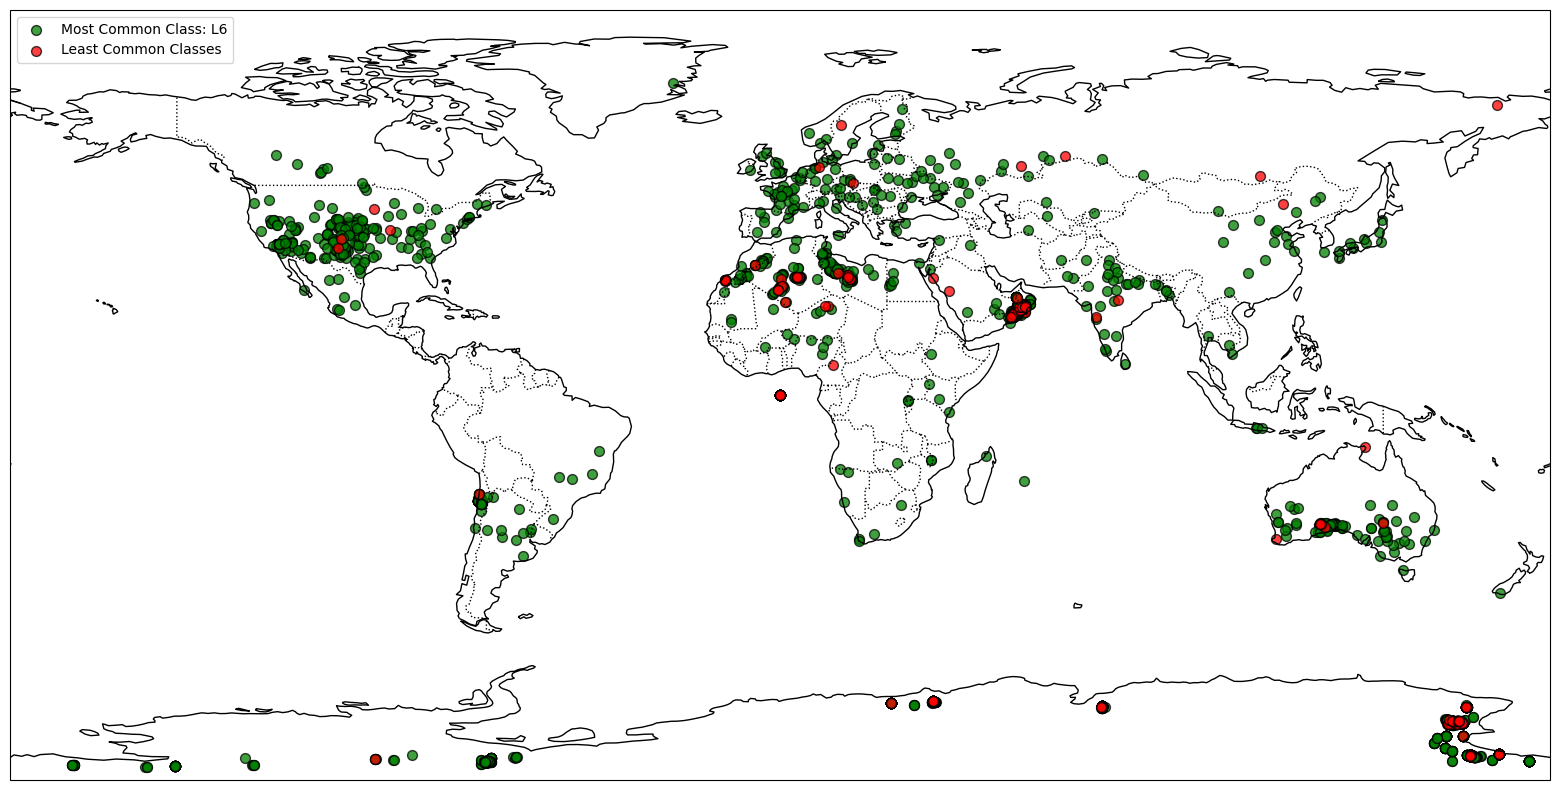

In [ ]:
df = pd.read_csv("/content/Meteorite_Landings (1).csv")

# Count the occurrences of each meteorite class
class_counts = df['recclass'].value_counts()
print(class_counts)
# Get the most common class
most_common_class = class_counts.idxmax()
print(most_common_class)
# Get the least common class(es), there might be multiple classes with a minimum count
least_common_classes = class_counts[class_counts == class_counts.min()].index
print(least_common_classes)

# Filter rows for the most and least common classes
most_common_meteorites = df[df['recclass'] == most_common_class]
least_common_meteorites = df[df['recclass'].isin(least_common_classes)]


# Initialize a Cartopy map
fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# Add map features
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Plot the most common meteorite landings
ax.scatter(most_common_meteorites['reclong'], most_common_meteorites['reclat'],
           s=50, color='green', label=f'Most Common Class: {most_common_class}', edgecolor='black', alpha=0.75)

# Plot the least common meteorite landings
ax.scatter(least_common_meteorites['reclong'], least_common_meteorites['reclat'],
           s=50, color='red', label='Least Common Classes', edgecolor='black', alpha=0.75)

# Add a legend to the map
ax.legend(loc='upper left')

# Set the extent of the map if needed
ax.set_extent([-180, 180, -90, 90])

# Show the map
plt.show()


# --- Todo=
# 1.) Intrestign meteriotes for most commom and least common - material - price
# 2.) meteriote near to earth / away of the equater - location of meteriiote
# 3.) which material burn in of reasons

In [ ]:
!pip install plotly

import pandas as pd
import plotly.express as px

# Assuming 'df' is your DataFrame with the meteorite data loaded.

# Calculate the frequency of occurrences for each recclass
class_counts = df['recclass'].value_counts()

# Identify the most common and least common recclass
most_common_class = class_counts.idxmax()
least_common_classes = class_counts[class_counts == class_counts.min()].index.tolist()

# Create a new column to label meteorites as 'Most Common Class', 'Least Common Class', or 'Other'
df['Class Label'] = df['recclass'].apply(lambda x: 'Most Common Class' if x == most_common_class
                                          else ('Least Common Class' if x in least_common_classes else 'Other'))

# Now filter the DataFrame to include only the most common and least common classes
df_filtered = df[df['Class Label'] != 'Other']

# Create the scatter mapbox plot with updated visual settings
fig_map = px.scatter_mapbox(df_filtered, lat='reclat', lon='reclong',
                            hover_name='name', color='Class Label',
                            hover_data=['mass (g)', 'year', 'recclass'],
                            category_orders={"Class Label": ["Most Common Class", "Least Common Class"]},
                            color_discrete_map={"Most Common Class": "green", "Least Common Class": "red"},
                            # size='mass (g)',  # Optional: Size points by mass
                            size_max=15,  # Optional: Set max size for visibility
                            zoom=1, height=300)

# Customize the layout of the map
fig_map.update_layout(
    mapbox_style='open-street-map',
    mapbox=dict(center=dict(lat=0, lon=0), zoom=1),
    margin=dict(l=0, r=0, t=0, b=0)
)

# Optionally, add custom symbols for each class
fig_map.update_traces(marker=dict(symbol='circle', size=10),line=dict(width=2, color='black'), selector=dict(mode='markers+text'))

# Display the map
fig_map.show()




In [ ]:
import pandas as pd
import plotly.express as px

# Assuming 'df' is your DataFrame with the meteorite data already loaded.

# Handle NaN values in the 'mass (g)' column
df = df.dropna(subset=['mass (g)'])

# Group meteorite data by recclass and calculate the mean mass for each class
df_masses = df.groupby('recclass')['mass (g)'].mean().reset_index()

# Find the recclass with the highest average mass
highest_avg_mass_class = df_masses.loc[df_masses['mass (g)'].idxmax()]

# Filter the original dataframe to include only meteorites from the highest average mass class
df_highest_avg_mass = df[df['recclass'] == highest_avg_mass_class['recclass']]

# Create a scatter mapbox plot for the highest average mass class
fig_map = px.scatter_mapbox(df_highest_avg_mass, lat='reclat', lon='reclong',
                            hover_name='name', color='recclass',
                            hover_data=['mass (g)', 'year'],
                            zoom=1, height=600)

# Customize the layout of the map
fig_map.update_layout(
    mapbox_style='open-street-map',
    mapbox=dict(center=dict(lat=0, lon=0), zoom=1),
    margin=dict(l=0, r=0, t=0, b=0),
    title=f"Locations of Meteorites from the Class with Highest Average Mass: {highest_avg_mass_class['recclass']}"
)

# Display the map
fig_map.show()

# Now, create a bar chart for the average mass of the top 20 recclasses
df_top_masses = df_masses.sort_values(by='mass (g)', ascending=False).head(20)
df_top_masses['mass (g)'] = df_top_masses['mass (g)'].round()

# Create a bar chart using plotly
fig_mass = px.bar(df_top_masses, y='mass (g)', x='recclass', text='mass (g)', title="<b>Top 20 Meteorite Classes by Average Mass (g)</b>", height=500)

# Customize the layout of the chart
fig_mass.update_layout(
    plot_bgcolor="rgba(0,0,0,0)",
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=False, title="Average Mass (g)"),
    barmode="stack"
)

# Set the color of the bars based on the mass
fig_mass.update_traces(marker_color=px.colors.sequential.Viridis_r)

# Display the bar chart
fig_mass.show()


In [ ]:
### ---------------------------------------------------------------------------------------------------Meterorite classes----------------------------------------------------------------------------------
### Reclass most common and least common - World Map

import pandas as pd
import plotly.express as px

# Assuming 'df' is your DataFrame with the meteorite data loaded.

# Calculate the count of occurrences for each recclass of meteorite
meteorite_class_counts = df['recclass'].value_counts()
print(meteorite_class_counts)

# Most common and least common recclass - L6 is most common class while there are many least common classes
most_common_class = meteorite_class_counts.idxmax() #L6
least_common_classes = meteorite_class_counts[meteorite_class_counts == meteorite_class_counts.min()].index.tolist()

# Create a new column to label meteorites as 'Most Common Class', 'Least Common Class', or 'Other'
df['Class Label'] = df['recclass'].apply(lambda x: 'Most Common Class' if x == most_common_class
                                          else ('Least Common Class' if x in least_common_classes else 'Other'))

# Include only the most common and least common classes
df_filtered = df[df['Class Label'] != 'Other']

# Create the scatter mapbox plot
world_map = px.scatter_mapbox(df_filtered, lat='reclat', lon='reclong',
                            hover_name='name', color='Class Label',
                            hover_data=['mass (g)', 'year', 'recclass'],
                            category_orders={"Class Label": ["Most Common Class", "Least Common Class"]},
                            color_discrete_map={"Most Common Class": "lightgreen", "Least Common Class": "red"},
                            zoom=1, height=300)

# Customize the layout of the map to include a transparent background
world_map.update_layout(
    mapbox_style='open-street-map',
    mapbox=dict(center=dict(lat=0, lon=0), zoom=1),
    margin=dict(l=0, r=0, t=0, b=0),
    mapbox_layers=[{
        "below": 'traces',
        "sourcetype": "raster",
        "sourceattribution": "OpenStreetMap",
        "source": [
            "https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}"
        ],
        "opacity": 1
    }]
)

# Most common class and least common classes on World map
world_map.show()


L6         8285
H5         7142
L5         4796
H6         4528
H4         4211
           ... 
EL7           1
CH/CBb        1
H/L~4         1
LL3.7-6       1
L/LL          1
Name: recclass, Length: 466, dtype: int64


In [ ]:
### Reclass most common and least common - Bar Graph

import pandas as pd
import plotly.express as px

top_classes = df['recclass'].value_counts().nlargest(20)

# Convert the Series to a DataFrame and rename the columns
top_classes_df = top_classes.reset_index()
top_classes_df.columns = ['recclass', 'Count']

# Create a bar plot using plotly, with the selected classes
Bargraph_classes = px.bar(top_classes_df, x='recclass', y='Count',
                     title="<b>Top 15 Meteorite Classes by Count</b>",
                     text='Count', height=500)

# Updating the layout of the plot
Bargraph_classes.update_layout(
    plot_bgcolor="rgba(0,0,0,0)",
    xaxis=dict(showgrid=True, title="Meteorite Classes"),
    yaxis=dict(showgrid=True, title="Counts"),
    showlegend=False,
)

# Color the bars based on the (count > 4000) of the meteorite classes
Bargraph_classes.update_traces(marker_color=['#4CAF50' if y > 4000 else '#6DFC73' for y in top_classes_df['Count']])

# Bar Graph figure
Bargraph_classes.show()


In [ ]:
### Reclass Average mass of Meteorite

import pandas as pd
import plotly.express as px

# Handling NaN mass values
df_cleaned = df.dropna(subset=['mass (g)'])

# Grouping meteorite data by recclass and finding the average mass for each meteorite class
class_mass_means = df_cleaned.groupby('recclass')['mass (g)'].mean().reset_index()

# Highest average mass class dataframe
max_mass_class = class_mass_means.loc[class_mass_means['mass (g)'].idxmax()]
df_max_mass_class = df_cleaned[df_cleaned['recclass'] == max_mass_class['recclass']]

# Bar chart of average mass of the top 20 recclasses
top_masses = class_mass_means.nlargest(20, 'mass (g)')
Bar_graph_mass = px.bar(top_masses, x='recclass', y='mass (g)',
                  title="<b>Top 20 Meteorite Classes by Average Mass</b>", height=500)

# Customize the layout and the color of the bars
Bar_graph_mass.update_layout(plot_bgcolor="rgba(0,0,0,0)", xaxis_showgrid=False, yaxis_title="Average Mass (g)")
Bar_graph_mass.update_traces(marker_color=px.colors.sequential.Viridis_r)

# Show the plots
Bar_graph_mass.show()


